## 3.1 RGB image of a tree
In this section we will create an RGB image of a tree. By the end of this section you should produce an image like this.

<img src=img/birch.op.png width=400>

In [1]:
from __future__ import print_function, division
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from run_start import *
from hips import hips2img

## Running start to create an RGB image

Below is an example of running a spectral simulation:

<code>echo <span style=color:red>14</span> <span style=color:blue>camera/simple.camera</span> <span style=color:green>light/simple.light</span> | <span style=color:brown>start</span> -v <span style=color:pink>-RATm 5</span> <span style=color:orange>-RATsensor_wavebands wb/waveband.dat</span> obj/birch_tree.obj</code>

where:

<code><span style=color:red>14</span></code> is the librat mode

<code><span style=color:blue>camera/simple.camera</span></code> points at the <code><span style="background-color:lightgrey">simple.camera</span></code> file

<code><span style=color:green>light/simple.light</span></code> points at the <code><span style="background-color:lightgrey">simple.light</span></code> file

This pipes to <span style=color:brown>start</span> running in verbose (-v) mode, <span style=color:brown>start</span> has the additional following options:

<code><span style=color:pink>-RATm 5</span></code> stipulates the oder of scattering, in this case 5 orders.

<code><span style=color:orange>-RATsensor_wavebands wb/waveband.dat</span></code> points at a list of wavebands to simulate, these do not have to correspond to wavelengths in the materials library as librat will perform a linear interpolation.

<code>birch_tree.obj</code> points at the <code><span style="background-color:lightgrey">birch_tree.obj</span></code>

/home/armstonj/anaconda3/lib/python3.5/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The spectral and spectral_r colormap was deprecated in version 2.0. Use nipy_spectral and nipy_spectral_r instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


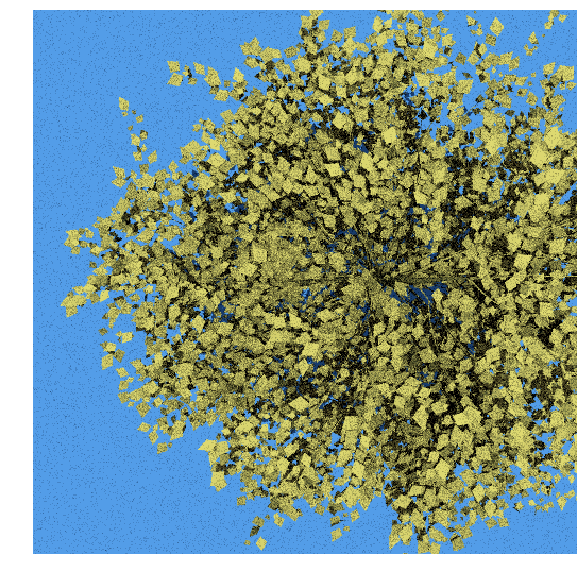

In [2]:
# all .obj and .dat are in specific folders e.g. camera.dat 
# is in the camera directory
cmd = 'echo 14 camera/simple.camera light/simple.light | \
       start -v -RATm 5 -RATsensor_wavebands wb/waveband.dat obj/birch_tree_scene.obj'
error = run_start(cmd)

if not error:
    # as stipulated in camera/simple.camera the output image is 
    # saved to output/birch.op.hips
    # 
    # When using hips2img to produce an RGB image, use the 'stretch' 
    # arg otherwise image is dark
    hips2img('output/birch.op.hips', stretch=True)

## Creating a spectra from the output
As well as producing an image, librat also produces a table of refletance.  This can be ordered by "wavelength" i.e. different wavelengths are the column headers, or as here, by scattering order.  This table can be read in using Numpy as below. Here the scattering orders have been summed (<code>refl[:, 1:].sum(axis=0)</code>).

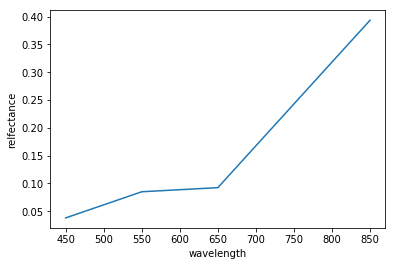

In [3]:
refl = np.loadtxt('output/birch.op.results.direct')
wb = np.loadtxt('wb/waveband.dat')
plt.plot(wb[:, 1], refl[:, 1:].sum(axis=0))
plt.xlabel('wavelength')
plt.ylabel('relfectance')